# 20210830 Initial Analysis

In [21]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits
import numpy as np
from importlib import reload
from imaka.analysis import plot_stats
from imaka.analysis import plot_redu
from imaka.reduce import util
from astropy.stats import sigma_clipped_stats

## Edit Me
from imaka.reduce.nights import reduce_2021_08_30 as redu
night = '20210830'
fld = 'Fld2'

root_dir = redu.root_dir
stats_dir = root_dir + "reduce/stats/"
plots_dir = root_dir + "reduce/plots/"
stack_dir = root_dir + "reduce/stacks/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
## Had an issue with stacking, the gfol
for key in list(redu.dict_images.keys()):
    for i in range(len(redu.dict_images[key])):
        img_num = redu.dict_images[key]
        suf = redu.dict_suffix[key]
        test_img_base = 'sta{img:03d}{suf:s}_scan'.format(img=img_num[i], suf=suf)
        stars = Table.read(root_dir + f'reduce/{fld}/' + test_img_base + '_clean_stars_stats.fits')
        print(f"key: {key} image {img_num[i]} stars: {len(stars)}")  

key: LS_BRIV image 17 stars: 475
key: LS_BRIV image 21 stars: 317
key: LS_BRIV image 25 stars: 1315
key: LS_BRIV image 29 stars: 1110
key: LS_BRIV image 33 stars: 444
key: open_BRIV image 19 stars: 91
key: open_BRIV image 23 stars: 136
key: open_BRIV image 27 stars: 153
key: open_BRIV image 31 stars: 107
key: open_BRIV image 35 stars: 106
key: tt_BRIV image 18 stars: 110
key: tt_BRIV image 22 stars: 59
key: tt_BRIV image 26 stars: 180
key: tt_BRIV image 30 stars: 141
key: tt_BRIV image 34 stars: 115
key: LS_IVBR image 50 stars: 345
key: LS_IVBR image 54 stars: 322
key: LS_IVBR image 58 stars: 260
key: LS_IVBR image 62 stars: 366
key: LS_IVBR image 66 stars: 340
key: open_IVBR image 52 stars: 97
key: open_IVBR image 56 stars: 111
key: open_IVBR image 60 stars: 155
key: open_IVBR image 64 stars: 172
key: open_IVBR image 68 stars: 196
key: tt_IVBR image 51 stars: 107
key: tt_IVBR image 55 stars: 138
key: tt_IVBR image 59 stars: 162
key: tt_IVBR image 63 stars: 218
key: tt_IVBR image 67 st

## Real time plots

In [8]:
redu.dict_images.keys()

dict_keys(['LS_BRIV', 'open_BRIV', 'tt_BRIV', 'LS_IVBR', 'open_IVBR', 'tt_IVBR'])

In [23]:
# pick a file based on key
key = 'LS_BRIV'
i=0
img_num = redu.dict_images[key]
suf = redu.dict_suffix[key]
test_img_base = 'sta{img:03d}{suf:s}_scan'.format(img=img_num[i], suf=suf)

#test_img_base = 'sta013LS_c_scan'

50% EE radius = 0.700"


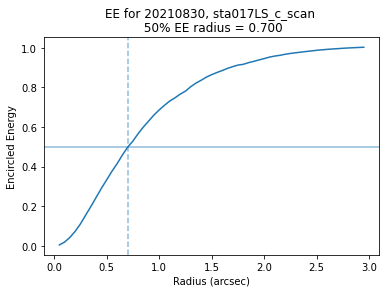

In [24]:
plot_redu.plot_ee_50(test_img_base, root_dir, fld, night)

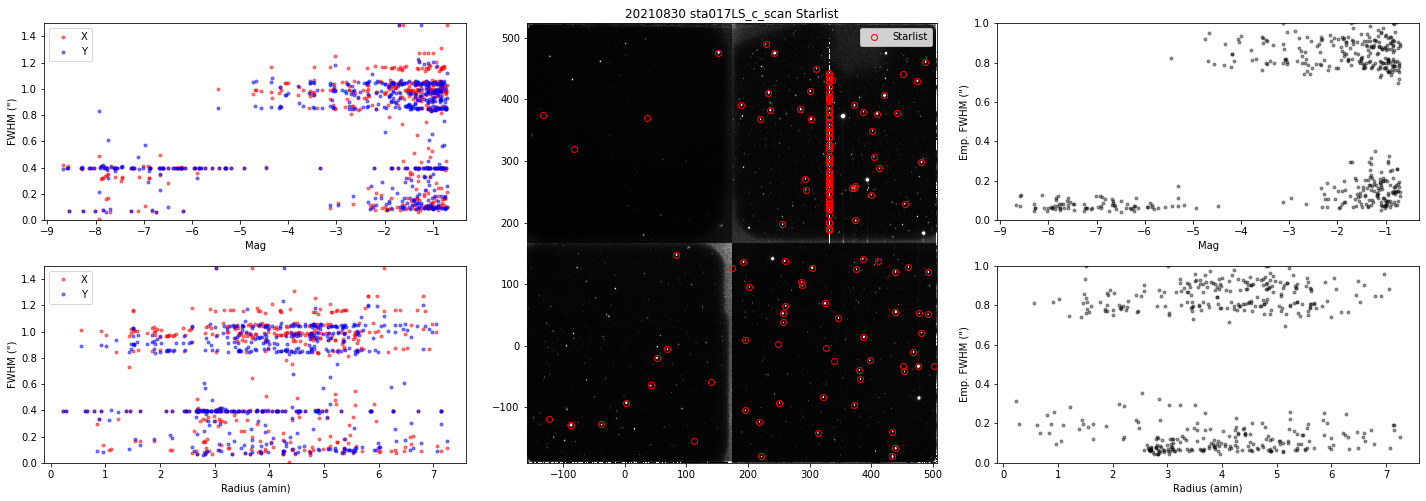

x: fwhm_x_avg = 0.68" fwhm_x_med = 0.85" fwhm_x_std = 0.39"
x: fwhm_x_avg = 0.68" fwhm_x_med = 0.85" fwhm_x_std = 0.39"


In [25]:
plot_redu.plot_starlist_stats(test_img_base, root_dir, fld, night)

Play with a star list and look at trends in FWHM, etc. 

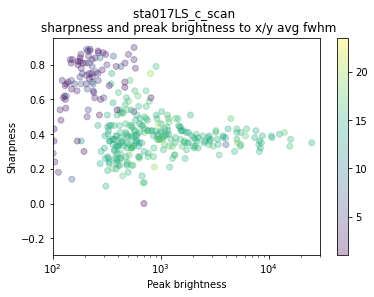

In [29]:
from astropy import table
# num pix vs fwhm
stars = table.Table.read(root_dir + f'reduce/{fld}/' + test_img_base + '_clean_stars.txt', format='ascii')
plt.scatter(stars['peak'], stars['sharpness'], c=np.average([stars['x_fwhm'], stars['y_fwhm']], axis=0), alpha=0.3)
plt.xlim(100, 30000)
plt.xscale('log')
plt.xlabel("Peak brightness")
plt.ylabel("Sharpness")
plt.title(test_img_base+ " \n sharpness and preak brightness to x/y avg fwhm")
plt.colorbar()

NOTE: extra stars on top edge and low edges here look like noise. Filtering starlists is advised

# STATS

## Moffat Profile

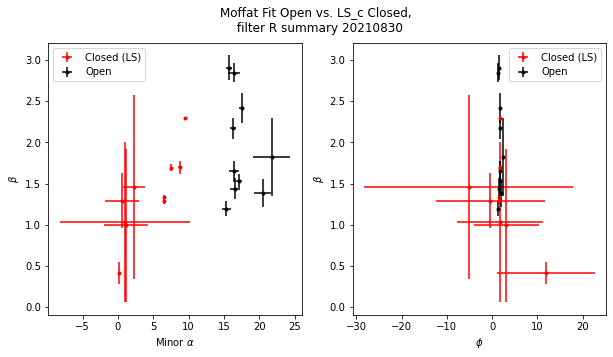

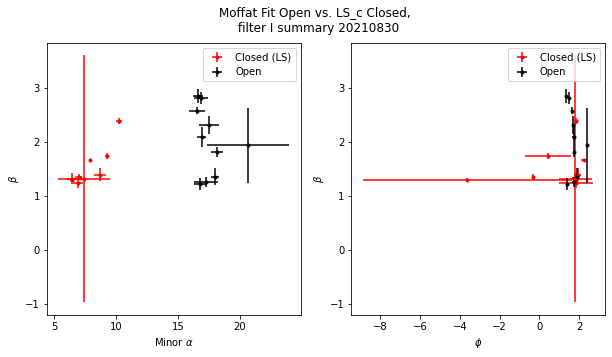

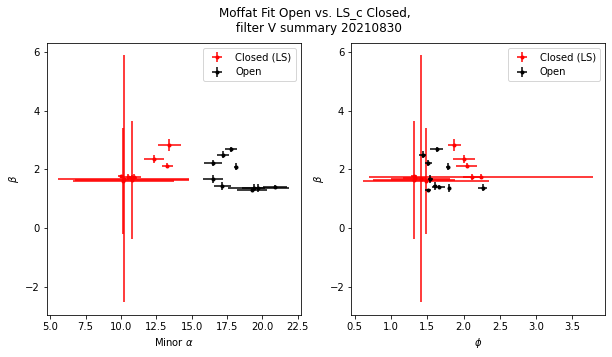

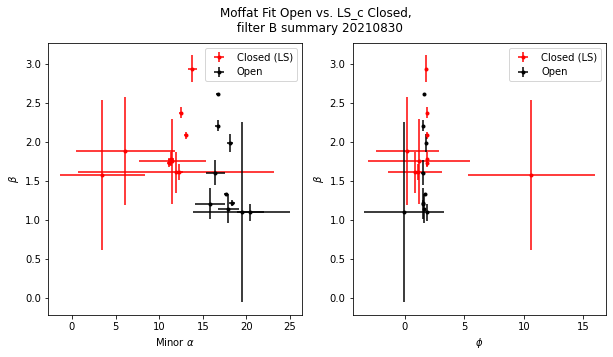

In [30]:
c_key = "LS_c"
plot_redu.plot_moffat_fit_4F("R", root_dir, c_key, fld, night)
plot_redu.plot_moffat_fit_4F("I", root_dir, c_key, fld, night)
plot_redu.plot_moffat_fit_4F("V", root_dir, c_key, fld, night)
plot_redu.plot_moffat_fit_4F("B", root_dir, c_key, fld, night)

In [32]:
c_key = "docz_c"
plot_redu.plot_moffat_fit_4F("R", root_dir, c_key, fld, night)
plot_redu.plot_moffat_fit_4F("I", root_dir, c_key, fld, night)
plot_redu.plot_moffat_fit_4F("V", root_dir, c_key, fld, night)
plot_redu.plot_moffat_fit_4F("B", root_dir, c_key, fld, night)

FileNotFoundError: [Errno 2] No such file or directory: '/g/lu/data/imaka/onaga/20210830/sta/reduce/stats/stats_docz_c_R_mdp.fits'

['Image', 'FILTER', 'BINFAC', 'DATE_UTC', 'TIME_UTC', 'DATE_HST', 'TIME_HST', 'FWHM', 'FWHM_std', 'EE25', 'EE50', 'EE80', 'NEA', 'NEA2', 'xFWHM', 'yFWHM', 'theta', 'emp_fwhm', 'emp_fwhm_std', 'quadrant', 'Index', 'N Stars', 'N Sky', 'N Sky std', 'Amplitude', 'Amplitude std', 'Phi', 'Phi std', 'Beta', 'Beta std', 'Minor Alpha', 'Minor Alpha std', 'Major Alpha', 'Major Alpha std']


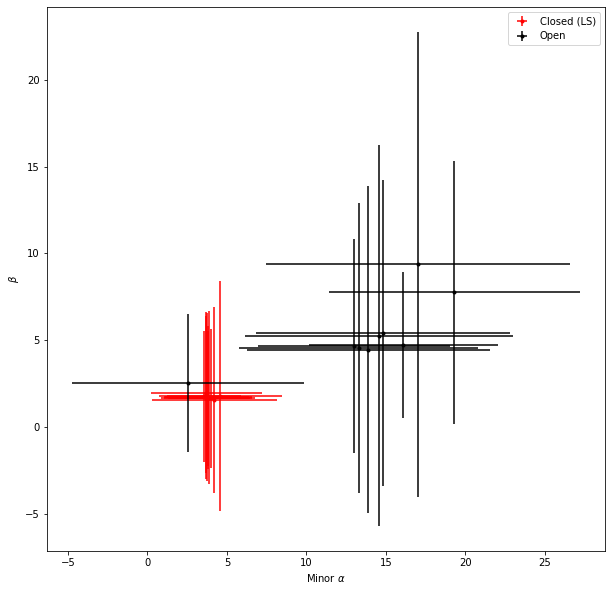

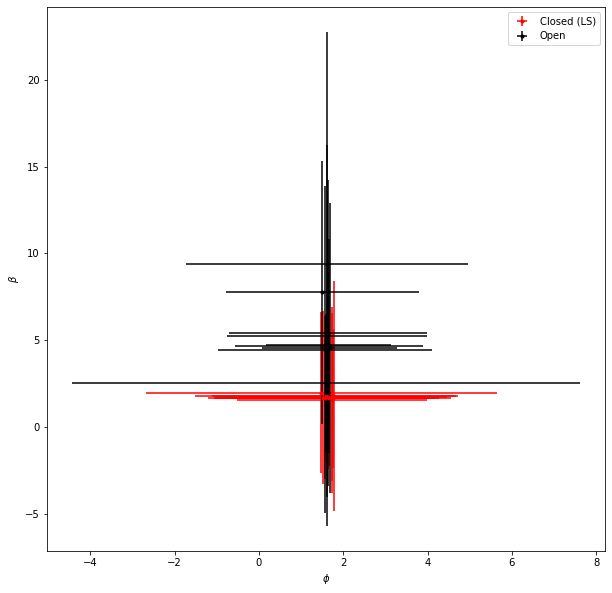

In [63]:
# stats by star
# FILTER INCLUDED
stats_c = Table.read(root_dir + 'reduce/stats/stats_LS_IVBR_mdp.fits')
stats_o = Table.read(root_dir + 'reduce/stats/stats_open_IVBR_mdp.fits')

# stats by stack? => doesn't work
#stats_c = Table.read(root_dir + 'reduce/stacks/fld2_stack_LS_c_stars_stats_mdp.fits')
#stats_o = Table.read(root_dir + 'reduce/stacks/fld2_stack__o_stars_stats.fits')

print(stats.colnames)

plt.figure(figsize=(10,10))
plt.clf()
plt.errorbar(stats_c['Minor Alpha'], stats_c['Beta'], xerr=stats_c['Minor Alpha std'], yerr=stats_c['Beta std'], fmt='r.', label='Closed (LS)')
plt.errorbar(stats_o['Minor Alpha'], stats_o['Beta'], xerr=stats_o['Minor Alpha std'], yerr=stats_o['Beta std'], fmt='k.', label='Open')
plt.xlabel(r'Minor $\alpha$')
plt.ylabel(r'$\beta$')
plt.legend()

plt.figure(figsize=(10,10))
plt.clf()
plt.errorbar(stats_c['Phi'], stats_c['Beta'], xerr=stats_c['Phi std'], yerr=stats_c['Beta std'], fmt='r.', label='Closed (LS)')
plt.errorbar(stats_o['Phi'], stats_o['Beta'], xerr=stats_o['Phi std'], yerr=stats_o['Beta std'], fmt='k.', label='Open')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\beta$')
plt.legend()

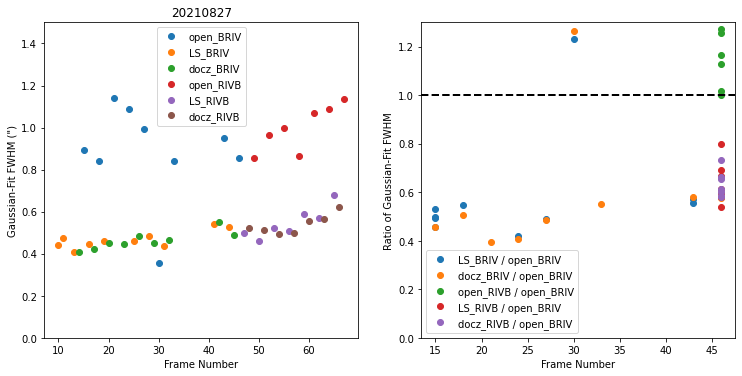

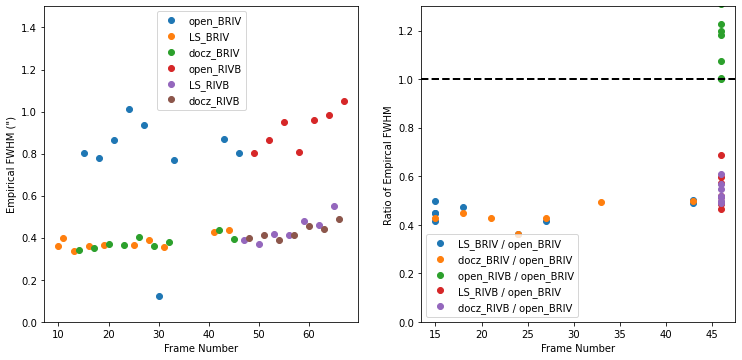

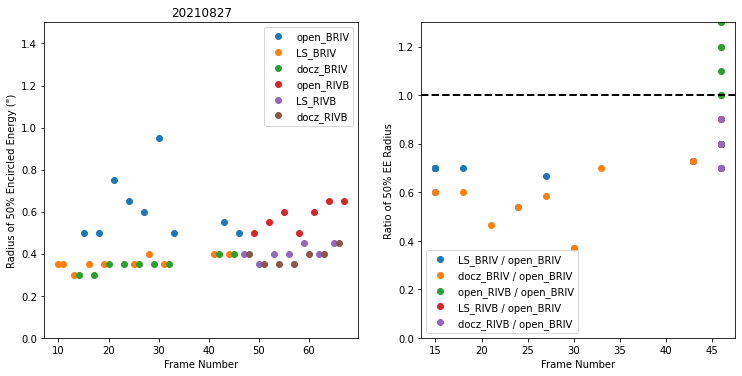

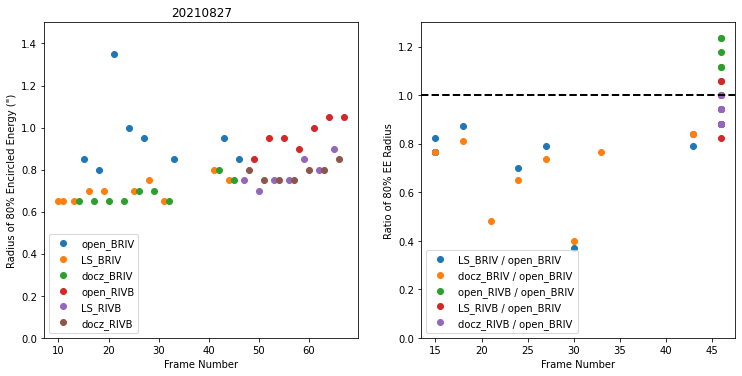

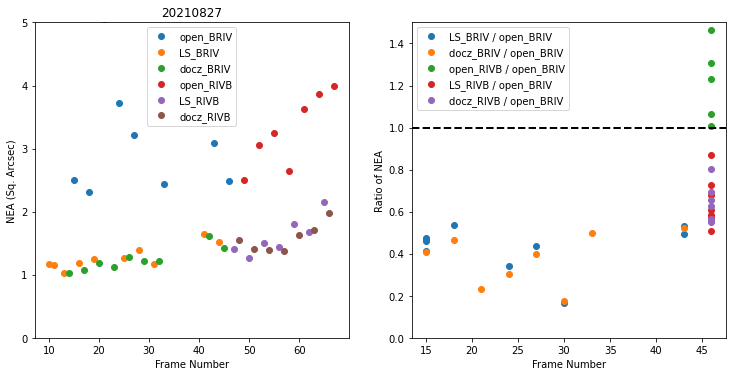

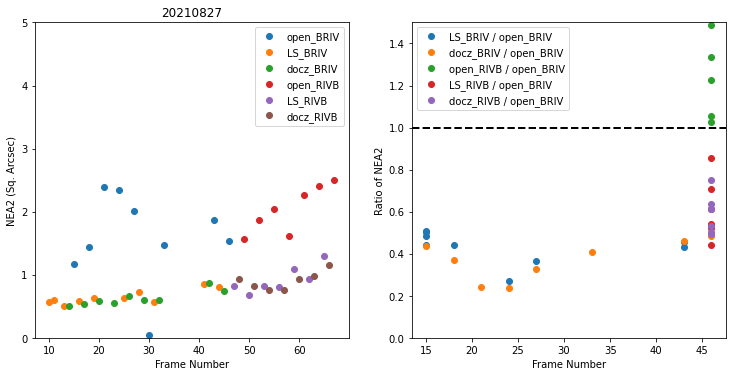

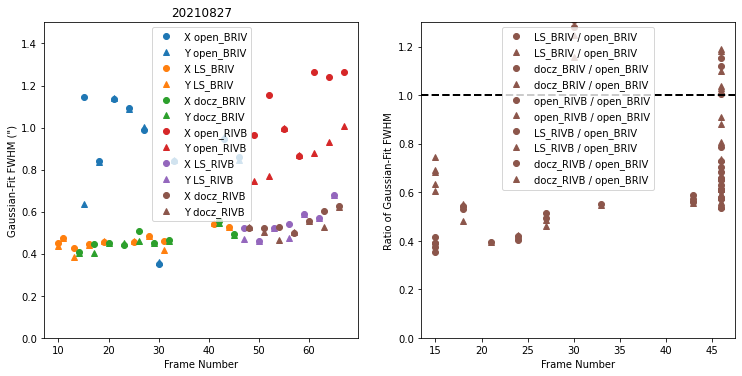

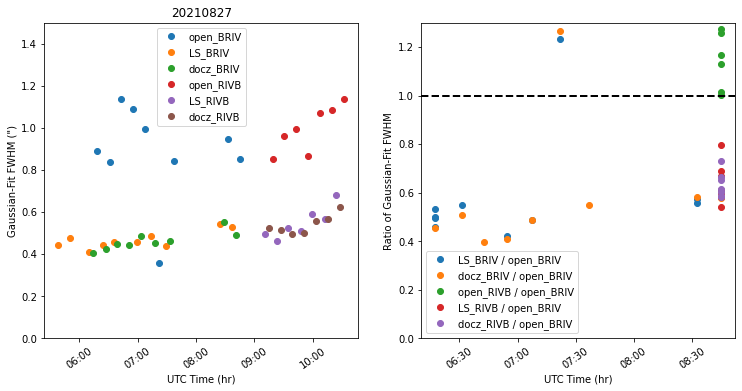

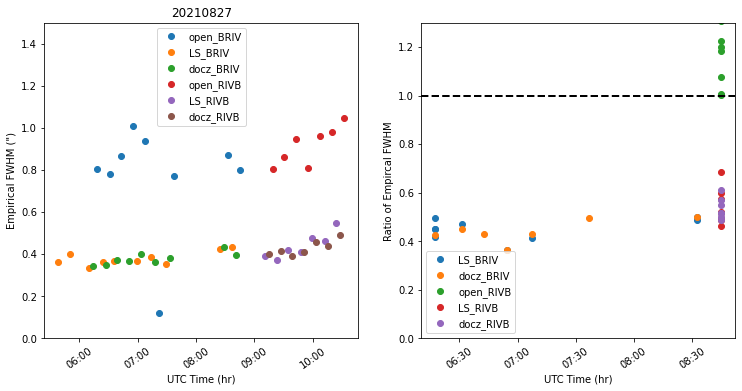

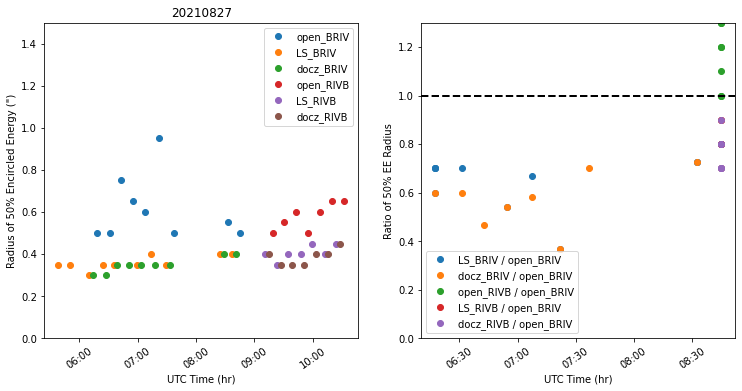

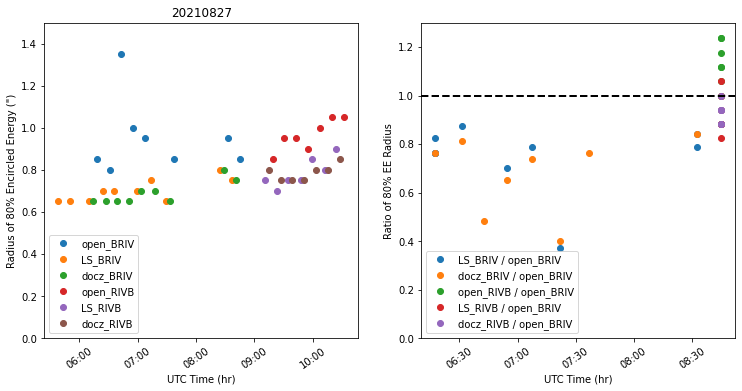

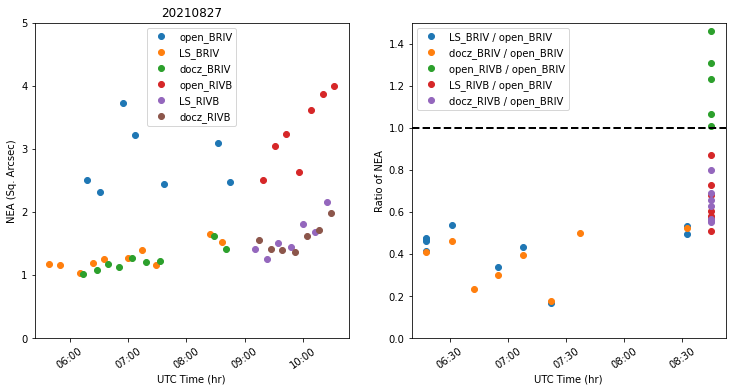

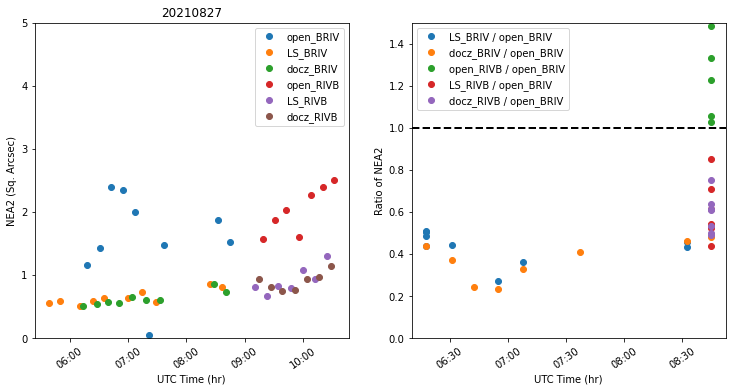

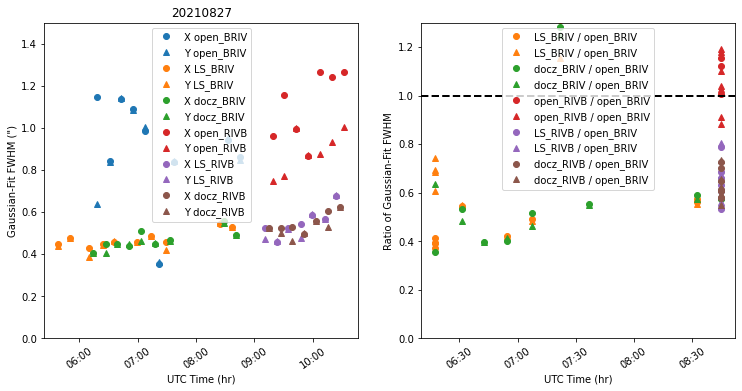

In [3]:
## Must have completed stats

suffixes = list(redu.dict_suffix.keys())
#suffixes = ['open_IVBR', 'LS_IVBR', 'docz_IVBR']
plot_stats.plot_stack_stats(night, suffixes, root_dir=root_dir + '../../', reduce_dir='sta/reduce/')

# Time Variation w/MASS-DIMM

Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm


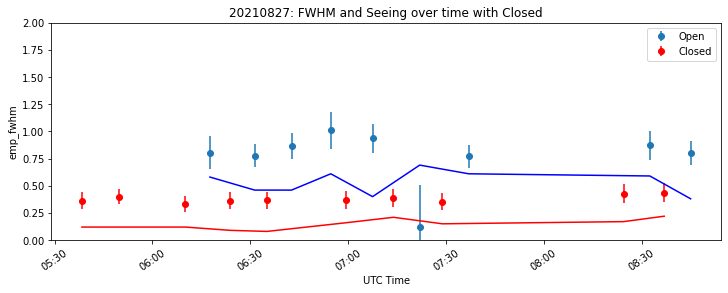

In [64]:
open_file = stats_dir +"stats_open_IVBR_mdp.fits"
closed_file1 = stats_dir+ "stats_LS_IVBR_mdp.fits"
plot_stats.plot_fwhmvt_nomatch(open_file, closed_file1, 'emp_fwhm', f"{night}: FWHM and Seeing over time with Closed", plots_dir)

Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm


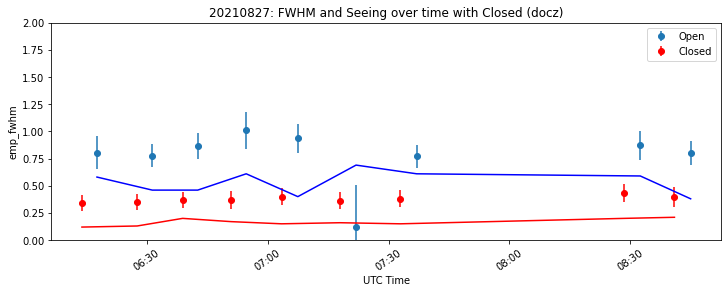

In [65]:
open_file = stats_dir +"stats_open_IVBR_mdp.fits"
closed_file2 = stats_dir+ "stats_docz_IVBR_mdp.fits"
plot_stats.plot_fwhmvt_nomatch(open_file, closed_file2, 'emp_fwhm', f"{night}: FWHM and Seeing over time with Closed (docz)", plots_dir)

# Aggregate Plots

In [69]:
list(redu.dict_suffix.keys())


['open_BRIV', 'LS_BRIV', 'docz_BRIV', 'open_RIVB', 'LS_RIVB', 'docz_RIVB']

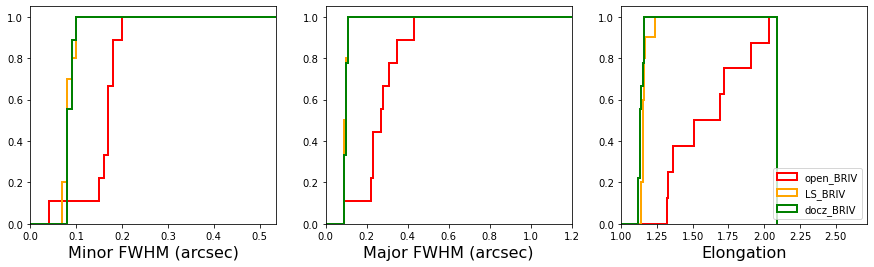

In [70]:
files = [open_file, closed_file1, closed_file2]
labels = ['open_BRIV', 'LS_BRIV', 'docz_BRIV']
colors = ['red', 'orange', 'green', 'blue', 'lightgreen', 'cyan']
plot_stats.comp_cdf(files, labels, colors)

In [ ]:
files = [open_file, closed_file1, closed_file2]
labels = ['open_IVBR', 'LS_IVBR', 'docz_IVBR']
colors = ['red', 'orange', 'green', 'blue', 'lightgreen', 'cyan']
plot_stats.comp_cdf(files, labels, colors)

KeyError: 'N Stars'

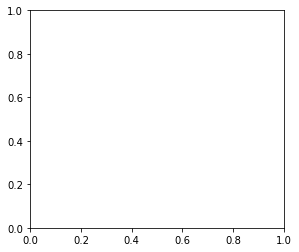

In [2]:
# 4F

from imaka.analysis import fourfilt

root = stats_dir
files_c = [root+"stats_c_B_mdp.fits", root+"stats_c_V_mdp.fits", root+"stats_c_R_mdp.fits", root+"stats_c_I_mdp.fits"]
files_o = [root+"stats__o_B_mdp.fits", root+"stats__o_V_mdp.fits", root+"stats__o_R_mdp.fits", root+"stats__o_I_mdp.fits"]

# don't have the moffat fits for these yet

fourfilt.plot_gain(files_o, files_c) 

In [4]:
Table.read(files_c[0])

FileNotFoundError: [Errno 2] No such file or directory: '/g/lu/data/imaka/onaga/20210827/sta/reduce/stats/stats_c_B_mdp.fits'

# Field Variability

In [19]:
from importlib import reload
reload(plot_stats)

<module 'imaka.analysis.plot_stats' from '/u/eden/code/imaka/imaka/analysis/plot_stats.py'>

### Closed loop, single exposure

sta019LS_c_scan
Median FWHM           = 0.343"
Median FWHM (clipped) = 0.344"
Mean FWHM             = 0.449"
Mean FWHM (clipped)   = 0.353"
Stddev FWHM           = 2.675"
Stddev FWHM (clipped) = 0.057"


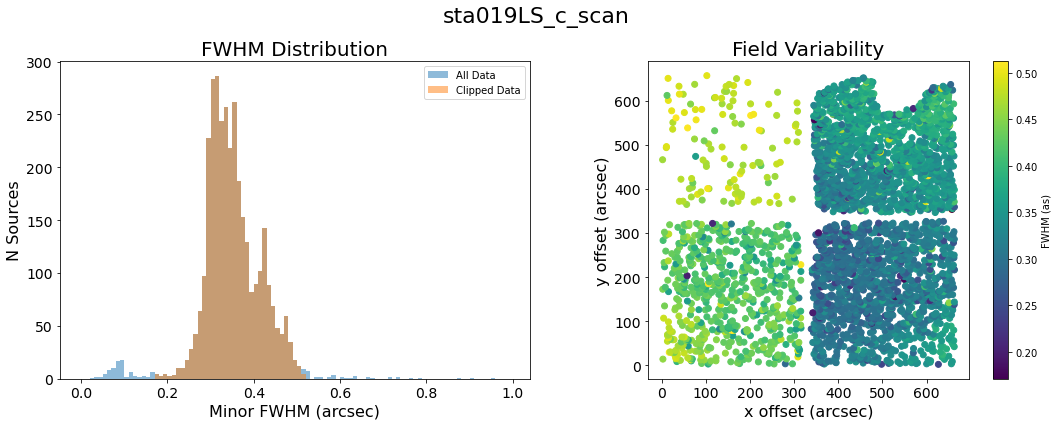

In [4]:
test_img_base = "sta019LS_c_scan"
print(test_img_base)
img_file = root_dir + 'reduce/Fld2/' + test_img_base + '_clean.fits'
starlist = root_dir + 'reduce/Fld2/' + test_img_base + '_clean_stars_stats_mdp.fits'
plot_stats.plot_var(img_file, starlist, test_img_base)

sta050LS_c_scan
Median FWHM           = 0.344"
Median FWHM (clipped) = 0.344"
Mean FWHM             = 0.390"
Mean FWHM (clipped)   = 0.353"
Stddev FWHM           = 0.802"
Stddev FWHM (clipped) = 0.054"


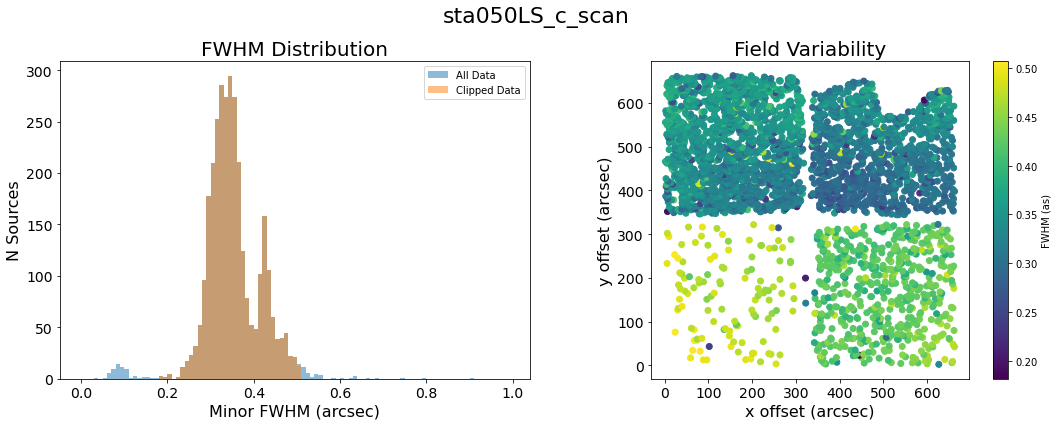

In [9]:
test_img_base = "sta050LS_c_scan"
print(test_img_base)
img_file = root_dir + 'reduce/Fld2/' + test_img_base + '_clean.fits'
starlist = root_dir + 'reduce/Fld2/' + test_img_base + '_clean_stars_stats_mdp.fits'
plot_stats.plot_var(img_file, starlist, test_img_base)

### Open Loop

Median FWHM           = 0.678"
Median FWHM (clipped) = 0.679"
Mean FWHM             = 0.794"
Mean FWHM (clipped)   = 0.681"
Stddev FWHM           = 1.808"
Stddev FWHM (clipped) = 0.081"


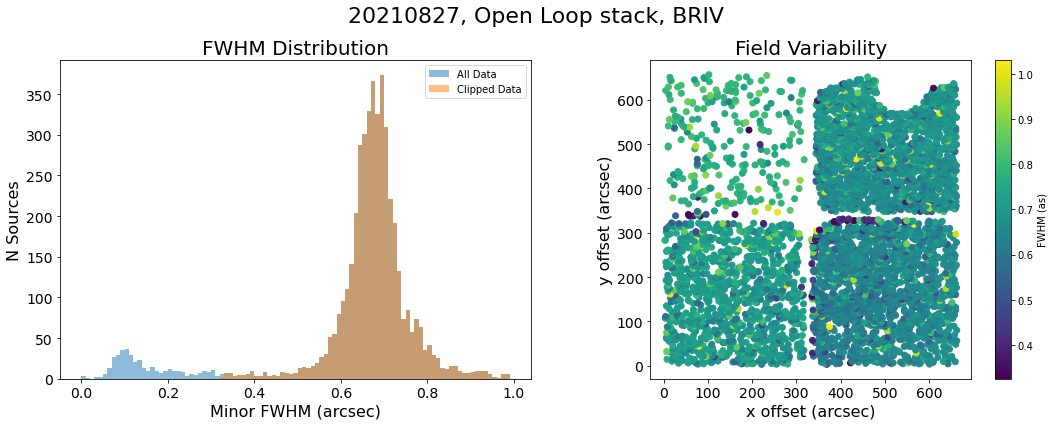

In [5]:
filt = 'BRIV'
img_file = stack_dir + f'fld2_stack__o_{filt}.fits' 
starlist = stack_dir + f'fld2_stack__o_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Open Loop stack, {filt}")

Median FWHM           = 0.766"
Median FWHM (clipped) = 0.767"
Mean FWHM             = 0.785"
Mean FWHM (clipped)   = 0.767"
Stddev FWHM           = 0.614"
Stddev FWHM (clipped) = 0.065"


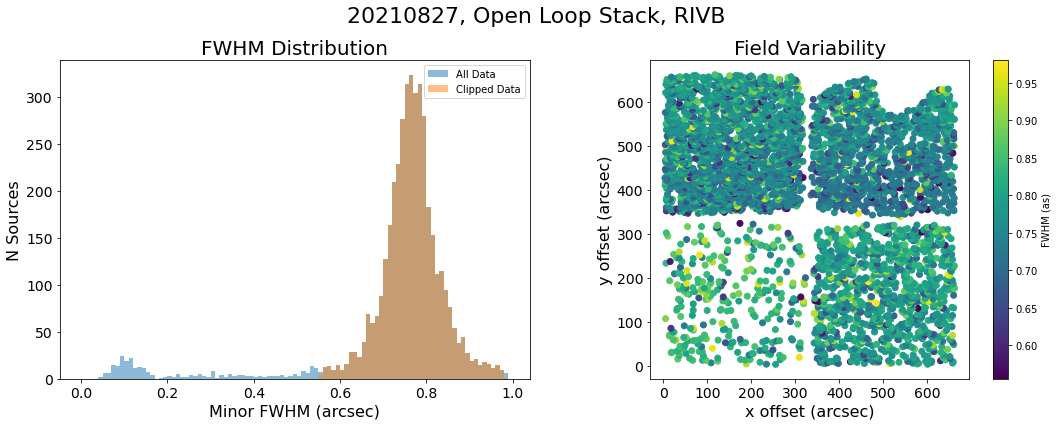

In [6]:
filt = 'RIVB'
img_file = stack_dir + f'fld2_stack__o_{filt}.fits' 
starlist = stack_dir + f'fld2_stack__o_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Open Loop Stack, {filt}")

### Closed (LS)

Median FWHM           = 0.338"
Median FWHM (clipped) = 0.336"
Mean FWHM             = 3053799083.815"
Mean FWHM (clipped)   = 0.589"
Stddev FWHM           = 347534255128.989"
Stddev FWHM (clipped) = 0.937"


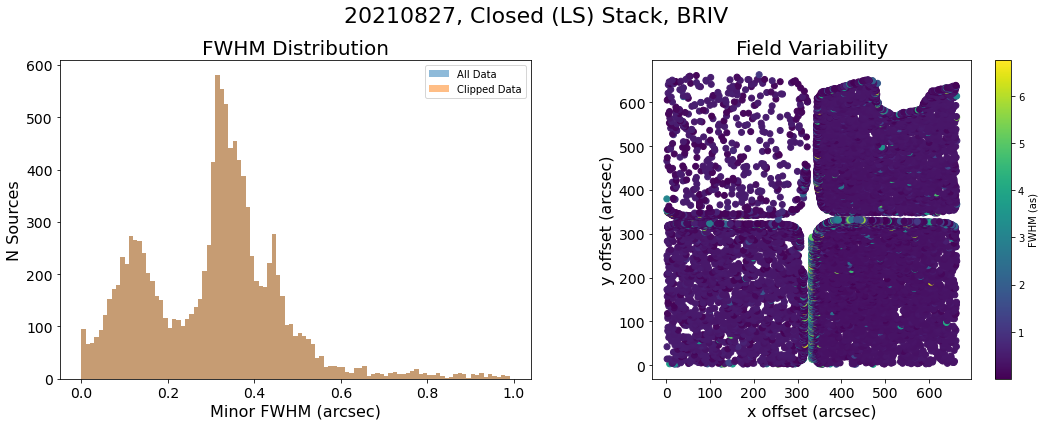

In [11]:
filt = 'BRIV'
img_file = stack_dir + f'fld2_stack_LS_c_{filt}.fits' 
starlist = stack_dir + f'fld2_stack_LS_c_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Closed (LS) Stack, {filt}")

Median FWHM           = 0.399"
Median FWHM (clipped) = 0.398"
Mean FWHM             = 42.446"
Mean FWHM (clipped)   = 0.390"
Stddev FWHM           = 3266.569"
Stddev FWHM (clipped) = 0.114"


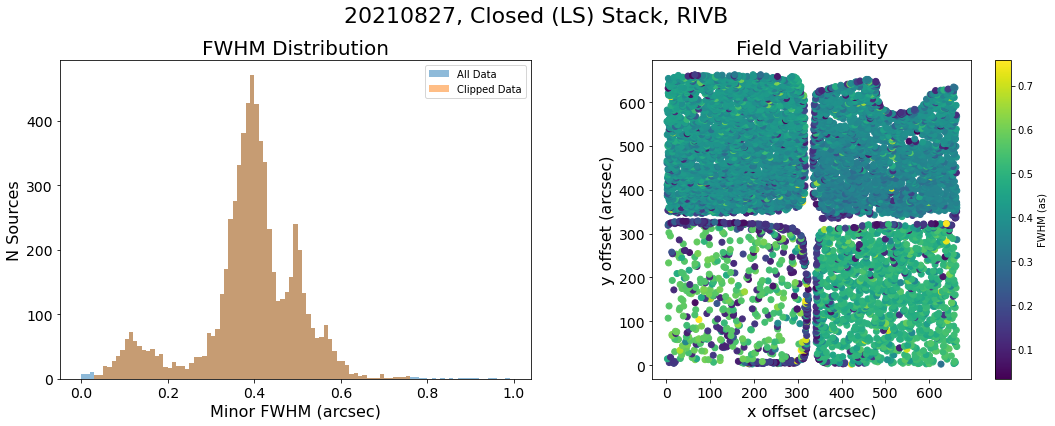

In [8]:
filt = 'RIVB'
img_file = stack_dir + f'fld2_stack_LS_c_{filt}.fits' 
starlist = stack_dir + f'fld2_stack_LS_c_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Closed (LS) Stack, {filt}")

### Closed (docz)

Median FWHM           = 0.345"
Median FWHM (clipped) = 0.341"
Mean FWHM             = 1425541024722.534"
Mean FWHM (clipped)   = 0.434"
Stddev FWHM           = 149410029198265.219"
Stddev FWHM (clipped) = 0.491"


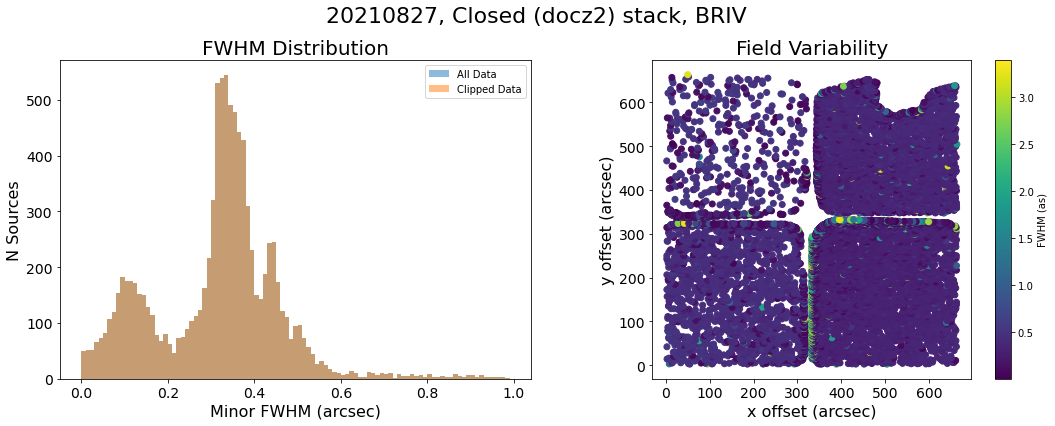

In [9]:
filt = 'BRIV'
img_file = stack_dir + f'fld2_stack_docz2_c_{filt}.fits' 
starlist = stack_dir + f'fld2_stack_docz2_c_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Closed (docz2) stack, {filt}")

Median FWHM           = 0.400"
Median FWHM (clipped) = 0.398"
Mean FWHM             = 0.712"
Mean FWHM (clipped)   = 0.397"
Stddev FWHM           = 11.580"
Stddev FWHM (clipped) = 0.106"


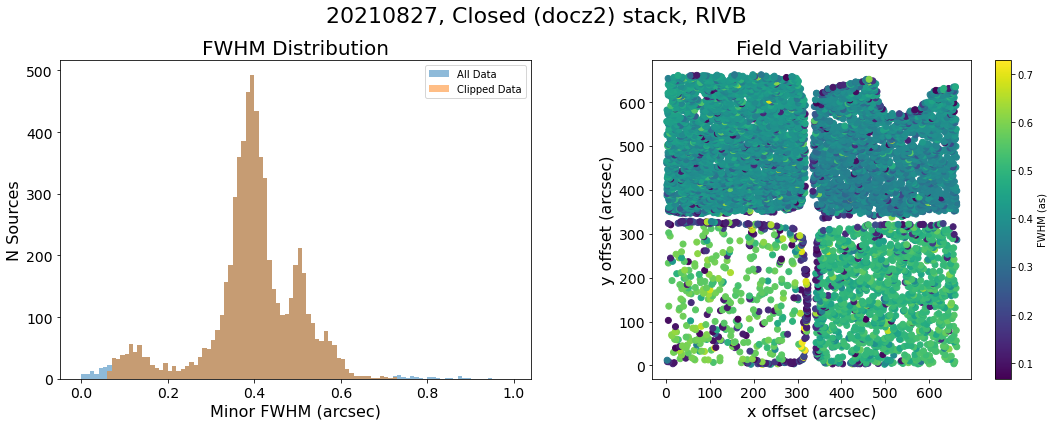

In [10]:
filt = 'RIVB'
img_file = stack_dir + f'fld2_stack_docz2_c_{filt}.fits' 
starlist = stack_dir + f'fld2_stack_docz2_c_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Closed (docz2) stack, {filt}")

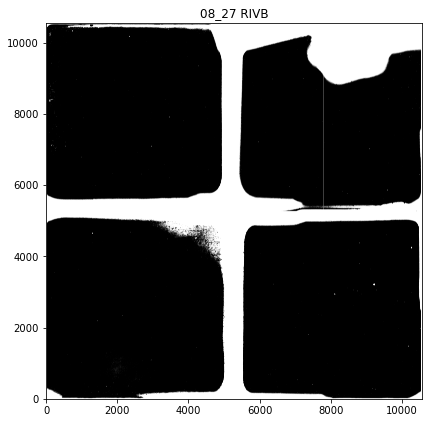

In [16]:
## What masks are we using? how are they different between orientations?
mask_dir = root_dir + "reduce/calib/"

hdul = fits.open(mask_dir +  "mask_RIVB.fits")

data = hdul[0].data

fig = plt.figure(figsize=(6,6))
plt.title("08_27 RIVB")
im = plt.imshow(data, origin ='lower', cmap='gray')
plt.tight_layout()
plt.show()
hdul.close()